<a href="https://colab.research.google.com/github/phuonggtrann/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [21]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean_var_std(l):
  mean = sum(l)/len(l)
  var  = sum([(mean-i)**2 for i in l])/len(l)
  std = math.sqrt(var)
  
  return mean, var, std

mean, var, std = mean_var_std(sales)
print("Mean:", mean, "\nVar:", var, "\nStd:", std)
# Check by nump
print("_________________________")
print("Mean:", np.mean(sales))
print("Var:", np.var(sales))
print("Std:", np.std(sales))

Mean: 3052.714285714286 
Var: 183761.06122448976 
Std: 428.67360686714756
_________________________
Mean: 3052.714285714286
Var: 183761.06122448976
Std: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [22]:
cus_no = [127, 80, 105, 92, 120, 115, 93]

def cov(a,b): # assuming 2 pop has same length
  return sum([(i-np.mean(a)) * (j-np.mean(b)) for i,j in zip(a,b)]) / len(a)

print("Cov by custom func:", cov(sales, cus_no))
print("Cov by np func:", np.cov(sales, cus_no, ddof=0)[0][1])

Cov by custom func: 6518.020408163265
Cov by np func: 6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [23]:
mean_sale, var_sale, std_sale = mean_var_std(sales)
mean_cus, car_cus, std_cus = mean_var_std(cus_no)
print("____________________________________")
print("Standard Dev for customer:", std_cus)
print("____________________________________")

def cor(a,b):
  meana, vara, stda = mean_var_std(a)
  meanb, varb, stdb = mean_var_std(b)
  cor = cov(a,b) / (stda*stdb)
  return cor
print("\nCorrelation by numpy:", np.corrcoef(sales, cus_no)[0][1])
print("Correlation by custom function:", cor(sales, cus_no))

____________________________________
Standard Dev for customer: 15.792015549069118
____________________________________

Correlation by numpy: 0.9628339778148909
Correlation by custom function: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [31]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)

f.head()

# Finding numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [32]:
df_numeric.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [33]:
df_numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

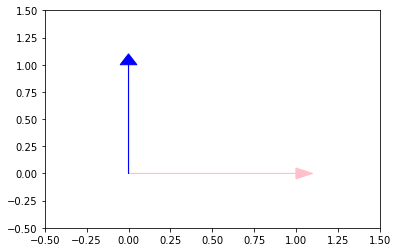

In [35]:
# Synonym for orthogonal is perpendicular

a=[1,0]
b=[0,1]

plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'pink')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [40]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

dot = np.dot(a,b) # same as matmul

print(dot)
if dot!=0:
  print("Not orthogonal since dot product is not zero")
else: 
  print("Orthogonal!")

-40
Not orthogonal since dot product is not zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [42]:
c = np.array([2, -15, 6, 20])

c_normsqr = (np.linalg.norm(c))**2
cc = np.dot(c,c)
ctc = (c.T)*c

print('The norm squared is:', c_normsqr)
print('c dot c is:', cc)
print('c_transpose*c is:', ctc)

The norm squared is: 665.0
c dot c is: 665
c_transpose*c is: [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align} e= 7\hat{i} + 12\hat{j} \end{align}


\begin{align} d= 2\hat{i} + 11\hat{j} + -8\hat{k} \end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [43]:
f = np.array([4, 12, 11, 9, 2])

fnorm = np.linalg.norm(f)
f_unitvec = np.multiply(f, 1/fnorm)
print(f_unitvec)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

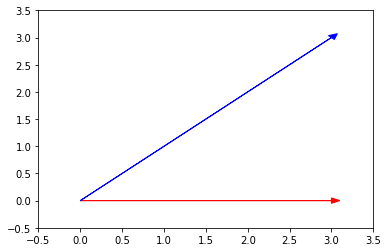

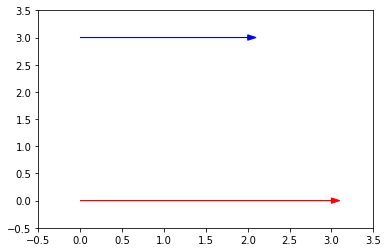

In [44]:
a = [3,0]
b = [3,3]
c = [3,0]
d = [2,0]

f1 = plt.figure(1)
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)

f2 = plt.figure(2)
plt.arrow(0,0, c[0],c[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,3, d[0],d[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [49]:
vecg = np.array([1,2])
vech = np.array([4,8])

ghmatrix = np.matrix([vecg,vech])

print("The span is:", np.linalg.matrix_rank(ghmatrix), "space")

The span is: 1 space


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [51]:
vecl = np.array([1,2,3])
vecm = np.array([-1,0,7])
vecn = np.array([4,8,2])

lmn_matrix = np.matrix([vecl,vecm,vecn])


print("The span is:", np.linalg.matrix_rank(lmn_matrix), "space")

The span is: 3 space


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



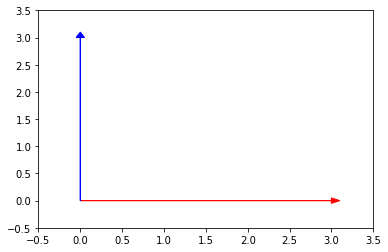

In [52]:
a = [3,0]
b = [0,3]


f1 = plt.figure(1)
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.show()

## 6.2 What does it mean to form a basis?

It means that the vectors are linearly independent and they span vector space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [53]:
matp = np.array([[1,2,3], [-1, 0, 7], [4,8,2]])

print("The rank is:", np.linalg.matrix_rank(matp), "space")

The rank is: 3 space


## 7.2 What does the rank of a matrix tell us?

It spans 3D space

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

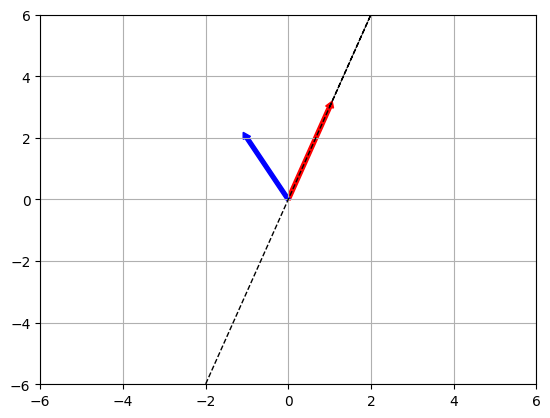

In [59]:
# init
vecv = np.array([1,3])
vecw = np.array([-1, 2])

# scaling
v_mult = np.multiply(vecv,2)
v_neg = np.negative(v_mult)

x_vals = [vecv[0],v_mult[0],v_neg[0]]
y_vals = [vecv[1],v_mult[1],v_neg[1]]
plt.arrow(0,0, vecv[0],vecv[1], head_width = 0.2, head_length = 0.2, width = 0.1, color = 'red')
plt.plot(x_vals, y_vals, '--', linewidth=1, color='black')
plt.arrow(0,0, vecw[0],vecw[1], head_width = 0.2, head_length = 0.2, width = 0.1, color = 'blue')


#axes = plt.gca()
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.style.use('default')
plt.grid(True)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

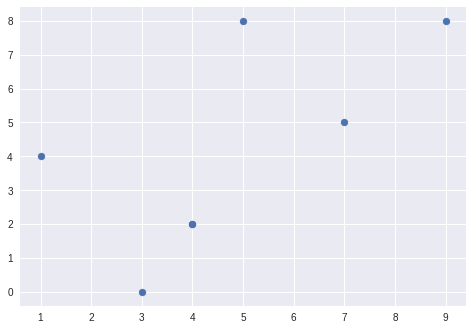

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()